## 주식_테슬라
"테슬라 주가 데이터 (지난 1년)" 데이터 세트는 포괄적이다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import warnings

In [2]:
df = pd.read_csv('/Users/leejieun/kaggle-notebooks/datasets/willianoliveiragibin/stock-tesla/stock daily tesla new.csv')

In [3]:
df.describe()

,Open,High,Low,Close
count,252.000000,252.000000,252.000000,252.000000
mean,211.235952,215.707222,206.703929,211.411905
std,44.850867,45.192237,44.577174,44.910936
min,103.000000,111.750000,101.810000,108.100000
25%,180.172500,184.880000,176.942500,181.205000
50%,212.365000,217.615000,208.215000,213.195000
75%,249.332500,254.925000,244.457500,250.212500
max,296.040000,299.290000,289.520000,293.340000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    252 non-null    object 
 1   Open    252 non-null    float64
 2   High    252 non-null    float64
 3   Low     252 non-null    float64
 4   Close   252 non-null    float64
 5   Volume  252 non-null    object 
dtypes: float64(4), object(2)
memory usage: 11.9+ KB


In [5]:
df.shape

(252, 6)

In [6]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [7]:
df.head()

,Date,Open,High,Low,Close,Volume
0,12/12/2023,103.00,111.75,101.81,108.10,"101,077,602"
1,12/11/2023,109.11,114.39,104.64,109.10,"101,377,906"
2,12/08/2023,110.35,114.59,107.16,110.34,"101,543,297"
3,12/07/2023,110.51,116.27,107.52,112.71,"101,596,305"
4,12/06/2023,116.55,118.80,108.24,113.06,"101,752,898"


In [8]:
df['Date'] = pd.to_datetime(df['Date'])
start_date = '2023-01-01'
end_date = '2023-12-31'
df_filtered = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

In [9]:
print(df_filtered['Close'].dtype)

float64


In [10]:
df.tail()

,Date,Open,High,Low,Close,Volume
247,2022-12-16,278.82,284.25,276.31,281.38,"98,595,328"
248,2022-12-15,279.56,285.30,277.60,282.48,"98,654,641"
249,2022-12-14,286.63,292.23,283.57,290.38,"99,038,641"
250,2022-12-13,290.15,295.26,286.01,291.26,"99,539,914"
251,2022-12-12,296.04,299.29,289.52,293.34,"99,777,430"


In [12]:
df_filtered = df_filtered.copy()

df_filtered['Close'] = pd.to_numeric(df_filtered['Close'].astype(str).str.replace(',',''), errors='coerce')

df_filtered = df_filtered.fillna(df_filtered['Close'].mean())

df_filtered['Close_Pct_Change'] = df_filtered['Close'].pct_change()

In [14]:
df_filtered['Volume'] = df_filtered['Volume'].astype(str).str.replace(',','').astype(float)

print(df_filtered.isnull().sum())
df_filtered['Close_Pct_Change'].fillna(df_filtered['Close_Pct_Change'].mean(), inplace=True)
print(df_filtered.isnull().sum())

X = df_filtered[['Open', 'High','Low', 'Volume', 'Close_Pct_Change']]
y = df_filtered['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)

Date                0
Open                0
High                0
Low                 0
Close               0
Volume              0
Close_Pct_Change    0
dtype: int64
Date                0
Open                0
High                0
Low                 0
Close               0
Volume              0
Close_Pct_Change    0
dtype: int64


/var/folders/hq/74v3821x34s_q34x5bq8cnh00000gn/T/ipykernel_87135/2633484602.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filtered['Close_Pct_Change'].fillna(df_filtered['Close_Pct_Change'].mean(), inplace=True)


In [15]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
print(f'Model Score: {regression_model.score(X_test, y_test)}')

Model Score: -484800149139.943


/Users/leejieun/miniforge3/envs/ai/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [16]:
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

train_score = regression_model.score(X_train, y_train)
test_score = regression_model.score(X_test, y_test)
print(f'Training Score: {train_score}')
print(f'Testing Score: {test_score}')

Training Score: 0.9995933593089116
Testing Score: -484800149139.943


/Users/leejieun/miniforge3/envs/ai/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


/Users/leejieun/miniforge3/envs/ai/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


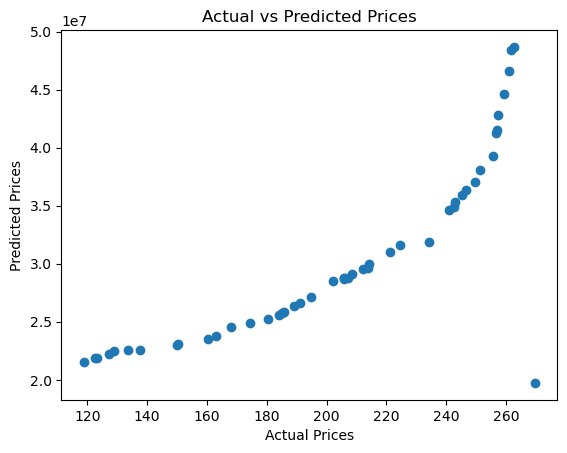

In [17]:
y_pred = regression_model.predict(X_test)

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

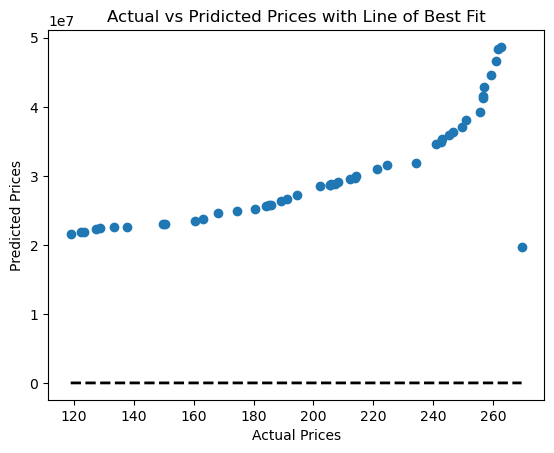

In [18]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Pridicted Prices with Line of Best Fit')
plt.show()

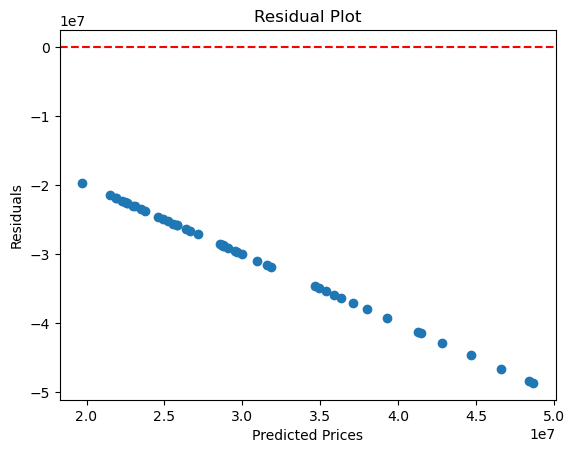

In [19]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In [20]:
df_filtered_reset = df_filtered.reset_index(drop=True)
print(df_filtered_reset['Date'].shape)
print(y_test.shape)
print(y_pred.shape)


(238,)
(48,)
(48,)


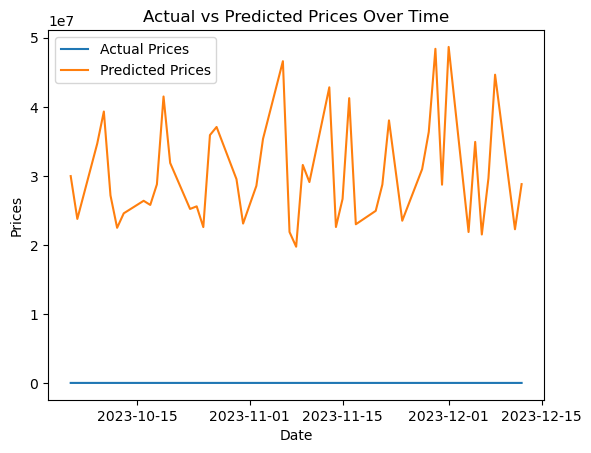

In [21]:
df_filtered_reset = df_filtered.reset_index(drop=True)

plt.plot(df_filtered_reset['Date'][:48], y_test, label='Actual Prices')
plt.plot(df_filtered_reset['Date'][:48], y_pred, label='Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.title('Actual vs Predicted Prices Over Time')
plt.legend()
plt.show()

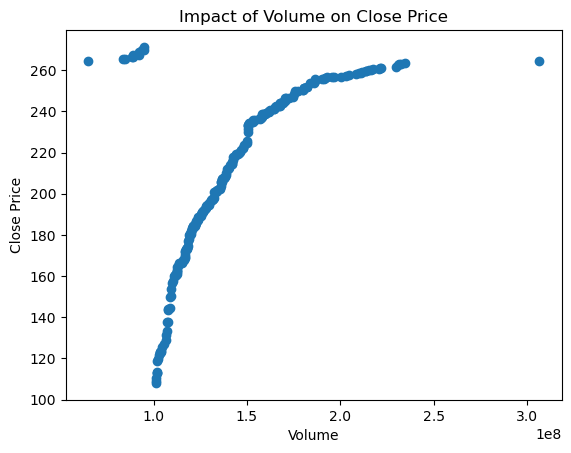

In [22]:
plt.scatter(df_filtered['Volume'], df_filtered['Close'])
plt.xlabel('Volume')
plt.ylabel('Close Price')
plt.title('Impact of Volume on Close Price')
plt.show()

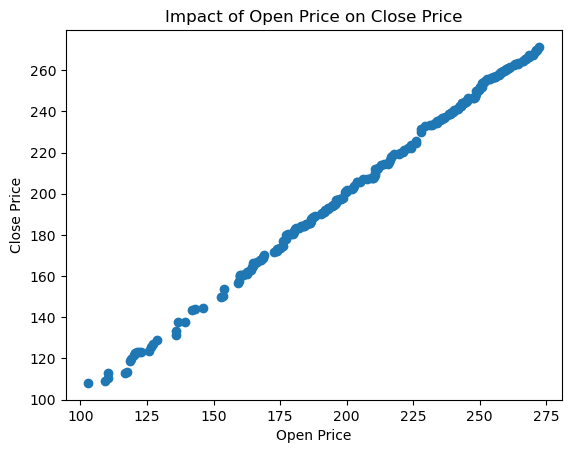

In [23]:
plt.scatter(df_filtered['Open'], df_filtered['Close'])
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.title('Impact of Open Price on Close Price')
plt.show()